# Cyclum on PC3 - Tuning Parameters



In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

import numpy as np

import cyclum.tuning

cell_line = "PC3"

Using TensorFlow backend.


# Get PC3 data

In [3]:
raw_Y = pd.read_pickle('/home/shaoheng/Documents/data/McDavid/pc3_df.pkl').T

cpt = pd.read_pickle('/home/shaoheng/Documents/data/McDavid/pc3_cpt.pkl').values
print("Original dimesion %d cells x %d genes." % raw_Y.shape)
print(f"G0/G1 {sum(cpt == 'g0/g1')}, S {sum(cpt == 's')}, G2/M {sum(cpt == 'g2/m')}")

Y = preprocessing.scale(raw_Y)

N, D = Y.shape
print('After filtering %d Cells (instances) x %d Genes (features)'%(N, D))

Original dimesion 361 cells x 253 genes.
G0/G1 [85], S [141], G2/M [135]
After filtering 361 Cells (instances) x 253 Genes (features)


In [8]:
model = cyclum.tuning.CyclumAutoTune(Y, max_linear_dims=10, 
                                     epochs=1000, rate=5e-4, verbose=100,
                                     encoder_width=[30, 20])


Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...
epoch: 100/1000, loss:  0.7292, time elapsed:  5.36s, time left:  48.23s
epoch: 200/1000, loss:  0.6680, time elapsed:  9.86s, time left:  39.45s
epoch: 300/1000, loss:  0.6560, time elapsed:  14.44s, time left:  33.69s
epoch: 400/1000, loss:  0.6508, time elapsed:  18.84s, time left:  28.27s
epoch: 500/1000, loss:  0.6439, time elapsed:  23.67s, time left:  23.67s
epoch: 600/1000, loss:  0.6451, time elapsed:  28.40s, time left:  18.94s
epoch: 700/1000, loss:  0.6428, time elapsed:  33.06s, time left:  14.17s
epoch: 800/1000, loss:  0.6471, time elapsed:  37.77s, time left:  9.44s
epoch: 900/1000, loss:  0.6398, time elapsed:  42.53s, time left:  4.73s
epoch: 1000/1000, loss:  0.6386, time elapsed:  47.49s, time left:  0.00s
[0.6385958228580179]
[0.6410022320730665, 0.5375855335495089, 0.44670153721506883, 0.42150841354719926, 0.40023852600104415, 0.3840829894960679, 0.

## Elbow plot

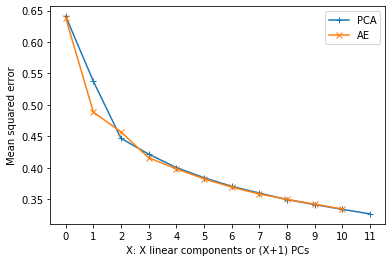

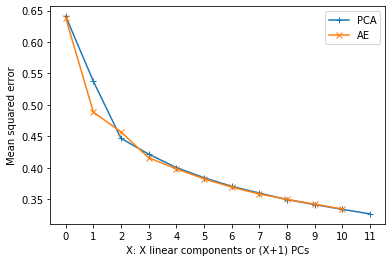

In [9]:
model.show_elbow()


## Bar plot

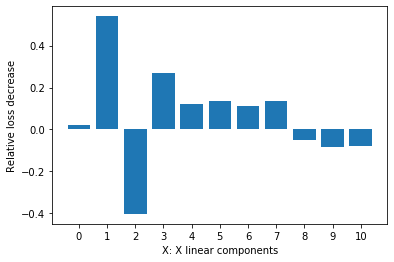

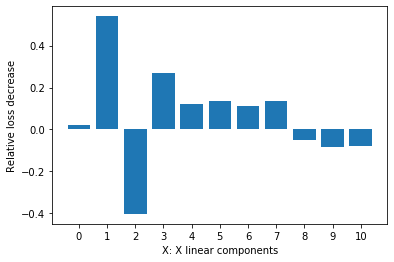

In [10]:
model.show_bar()


## Bar plot, difference of square root

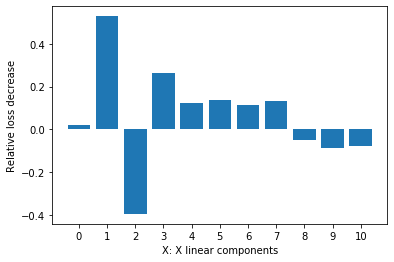

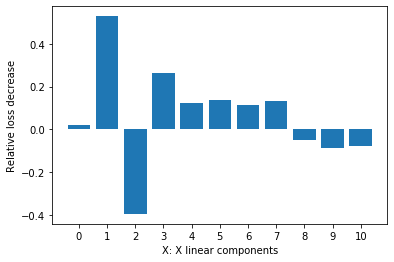

In [11]:
model.show_bar(root=True)

## Test model

In [13]:
import cyclum.models

model = cyclum.models.AutoEncoder(input_width=Y.shape[1],
                                  encoder_width=[30, 20], 
                                  encoder_depth=2,
                                 n_circular_unit=2,
                                 n_logistic_unit=0,
                                 n_linear_unit=0,
                                 n_linear_bypass=3,
                                 dropout_rate=0.1)
model.train(Y, epochs=1000, verbose=100, rate=2e-4)
pseudotime = model.predict_pseudotime(Y)

from cyclum.hdfrw import mat2hdf

mat2hdf(pseudotime, '../../data/McDavid/pc3-3-linear-pseudotime.h5')

layer = model.model.get_layer('decoder_out')
weights = layer.get_weights()[0]
mat2hdf(weights, "../../data/McDavid/pc3-3-linear-weight.h5")

epoch: 100/1000, loss:  0.4539, time elapsed:  5.82s, time left:  52.37s
epoch: 200/1000, loss:  0.4359, time elapsed:  10.78s, time left:  43.11s
epoch: 300/1000, loss:  0.4256, time elapsed:  15.61s, time left:  36.42s
epoch: 400/1000, loss:  0.4210, time elapsed:  20.31s, time left:  30.46s
epoch: 500/1000, loss:  0.4201, time elapsed:  25.08s, time left:  25.08s
epoch: 600/1000, loss:  0.4177, time elapsed:  29.93s, time left:  19.95s
epoch: 700/1000, loss:  0.4172, time elapsed:  34.70s, time left:  14.87s
epoch: 800/1000, loss:  0.4168, time elapsed:  39.47s, time left:  9.87s
epoch: 900/1000, loss:  0.4160, time elapsed:  44.31s, time left:  4.92s
epoch: 1000/1000, loss:  0.4160, time elapsed:  48.61s, time left:  0.00s


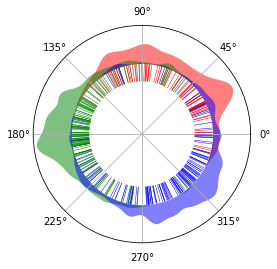

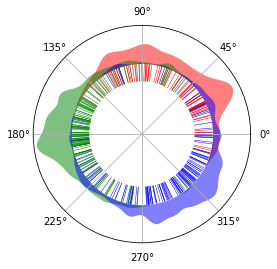

In [14]:
import cyclum.illustration
color_map = {"g0/g1": "red", "s": "green", "g2/m": "blue"}
cyclum.illustration.plot_round_distr_color(pseudotime[:, 0], cpt.squeeze(), color_map)

In [15]:
import cyclum.models

model = cyclum.models.AutoEncoder(input_width=Y.shape[1],
                                  encoder_width=[30, 20], 
                                  encoder_depth=2,
                                 n_circular_unit=2,
                                 n_logistic_unit=0,
                                 n_linear_unit=0,
                                 n_linear_bypass=1,
                                 dropout_rate=0.1)
model.train(Y, epochs=1000, verbose=100, rate=2e-4)
pseudotime = model.predict_pseudotime(Y)

from cyclum.hdfrw import mat2hdf

mat2hdf(pseudotime, '../../data/McDavid/pc3-1-linear-pseudotime.h5')

layer = model.model.get_layer('decoder_out')
weights = layer.get_weights()[0]
mat2hdf(weights, "../../data/McDavid/pc3-1-linear-weight.h5")

epoch: 100/1000, loss:  0.5894, time elapsed:  5.76s, time left:  51.86s
epoch: 200/1000, loss:  0.5374, time elapsed:  10.73s, time left:  42.91s
epoch: 300/1000, loss:  0.5127, time elapsed:  15.66s, time left:  36.55s
epoch: 400/1000, loss:  0.5038, time elapsed:  20.45s, time left:  30.68s
epoch: 500/1000, loss:  0.5012, time elapsed:  25.41s, time left:  25.41s
epoch: 600/1000, loss:  0.5006, time elapsed:  30.38s, time left:  20.25s
epoch: 700/1000, loss:  0.4994, time elapsed:  35.22s, time left:  15.09s
epoch: 800/1000, loss:  0.5000, time elapsed:  40.31s, time left:  10.08s
epoch: 900/1000, loss:  0.4969, time elapsed:  45.29s, time left:  5.03s
epoch: 1000/1000, loss:  0.4988, time elapsed:  50.33s, time left:  0.00s


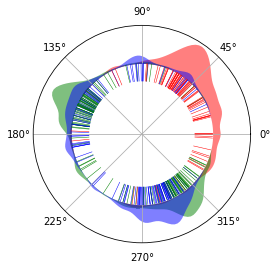

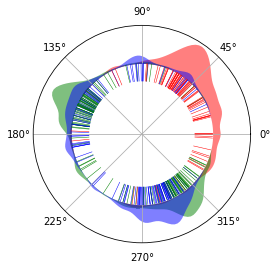

In [16]:
import cyclum.illustration
color_map = {"g0/g1": "red", "s": "green", "g2/m": "blue"}
cyclum.illustration.plot_round_distr_color(pseudotime[:, 0], cpt.squeeze(), color_map)

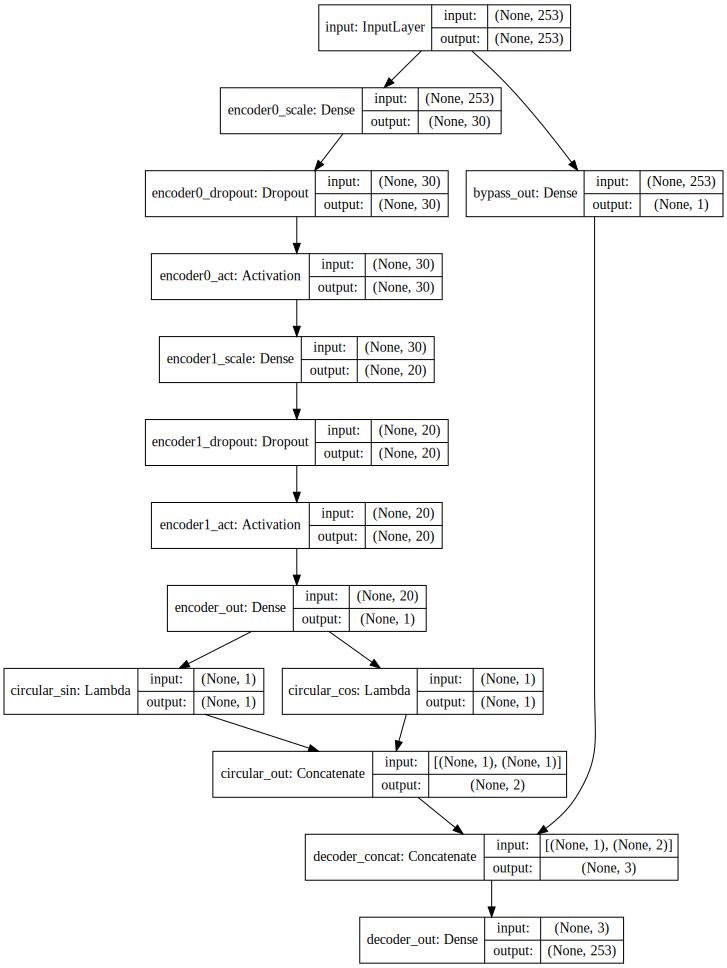

In [17]:
model.show_structure()